In [1]:
# This code allows us to use PySpark in Jupyter Notebook
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('iteration-4').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/23 23:09:02 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
### 01-BU
# The data mining objective is to explore the relationship between lung cancer and factors studied in the data,
# and to identify the key factors or features that significantly increase the risk of getting lung cancer.

In [3]:
### 02-DU

# Load the csv file "Pesticide and Lung Cancer 1"
LC_1 = spark.read.csv('Pesticide and Lung Cancer 1.csv', header=True, inferSchema=True)
display(LC_1.toPandas().head(10))

,ID,LungCA,Gender,Age,Age_group,Status,Education,Occupation,Residency,Distances,Cooking_fume,Air_Pollution_Exposure,CigSmoke,Cigarette_year,Cigarette_number,CigSmoke_status
0,1,0,1,38,1,2,1,1,3,1,2,1,0,0,0,1
1,2,0,0,42,1,2,1,1,3,3,2,0,0,0,0,1
2,3,0,0,44,1,2,2,1,2,1,2,0,0,0,0,1
3,4,0,0,45,1,2,1,1,3,1,2,1,0,0,0,1
4,5,0,1,45,1,2,1,1,2,2,1,1,0,0,0,1
5,6,0,0,46,1,2,1,1,3,3,2,0,0,0,0,1
6,7,0,1,48,1,2,1,1,2,3,1,1,0,0,0,1
7,8,0,0,49,1,2,3,1,3,1,2,0,0,0,0,1
8,9,0,1,50,1,2,1,1,3,3,2,0,0,0,0,1
9,10,0,0,50,1,2,1,1,2,1,2,1,0,0,0,1


In [4]:
# Summary Stats
LC_1_Summary=LC_1.describe()
display(LC_1_Summary.toPandas().head())

,summary,ID,LungCA,Gender,Age,Age_group,Status,Education,Occupation,Residency,Distances,Cooking_fume,Air_Pollution_Exposure,CigSmoke,Cigarette_year,Cigarette_number,CigSmoke_status
0,count,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683
1,mean,342.0,0.3440702781844802,0.5900439238653001,65.48609077598829,2.6207906295754024,2.0658857979502194,1.102489019033675,1.4348462664714494,2.6456808199121524,1.992679355783309,1.6793557833089312,0.5021961932650073,0.44363103953147875,13.106881405563689,5.144948755490483,1.6178623718887262
2,stddev,197.30940170199696,0.4754122838426822,0.4921857091194481,10.907678283942905,1.0064198422701132,0.4433198191058934,0.33997103694915776,0.4961001265560059,0.6635180811520884,0.9340130337330217,0.46706627369616643,0.5003616078176489,0.49717647790179076,17.976573124926418,7.367664359429377,0.7651328436426961
3,min,1,0,0,31,1,1,1,1,1,1,1,0,0,0,0,1
4,max,683,1,1,98,4,3,3,2,3,3,2,1,1,70,45,3


+------+-----+
|LungCA|count|
+------+-----+
|     1|  235|
|     0|  448|
+------+-----+



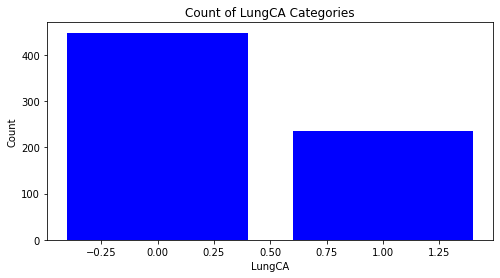

In [5]:
# Bar plot
import matplotlib.pyplot as plt

lung_ca_counts = LC_1.groupBy("LungCA").count()
lung_ca_counts.show()

lung_ca_counts_pd = lung_ca_counts.toPandas()
plt.figure(figsize=(8, 4))
plt.bar(lung_ca_counts_pd['LungCA'], lung_ca_counts_pd['count'], color='blue')
plt.xlabel('LungCA')
plt.ylabel('Count')
plt.title('Count of LungCA Categories')
plt.show()

+--------+-----+
|CigSmoke|count|
+--------+-----+
|       1|  303|
|       0|  380|
+--------+-----+



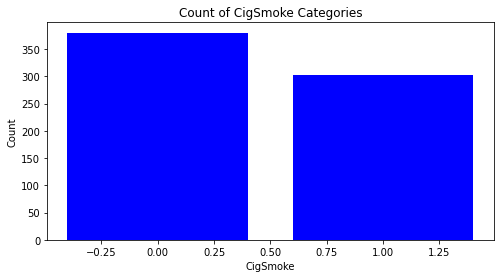

In [6]:
# Bar plot
import matplotlib.pyplot as plt

CigSmoke_counts = LC_1.groupBy("CigSmoke").count()
CigSmoke_counts.show()

CigSmoke_counts_pd = CigSmoke_counts.toPandas()
plt.figure(figsize=(8, 4))
plt.bar(CigSmoke_counts_pd['CigSmoke'], CigSmoke_counts_pd['count'], color='blue')
plt.xlabel('CigSmoke')
plt.ylabel('Count')
plt.title('Count of CigSmoke Categories')
plt.show()

In [7]:
# Load the csv file "Pesticide and Lung Cancer 2"
LC_2 = spark.read.csv('Pesticide and Lung Cancer 2.csv', header=True, inferSchema=True)
display(LC_2.toPandas().head(10))

24/05/23 23:09:16 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,ID,Herbicides,Herbicides_year,Herbicides_year_group,Herbicides_day,Herbicides_day_group,Insecticides,Insecticides_year,Insecticides_year_group,Insecticides_day,...,Carbaryl_Savins_days,Carbofuran_use,Carbofuran_days,Abamectin_use,Abamectin_days,Armure_Propiconazole_use,Armure_Propiconazole_days,Metal_aldehyde_use,Metal_aldehyde_days,Morphology_Group
0,1,1,5,1,120,1,1,5,1,360,...,,1.0,120,1.0,120,0.0,,0.0,,0.0
1,2,1,20,2,480,2,1,20,2,480,...,,0.0,,1.0,480,0.0,,0.0,,0.0
2,3,1,20,2,480,2,1,20,2,260,...,60,0.0,,1.0,60,1.0,120,0.0,,0.0
3,4,1,40,3,160,1,1,25,2,600,...,100,1.0,160,1.0,100,0.0,,0.0,,0.0
4,5,0,,,,,0,,,,...,,0.0,,0.0,,0.0,,0.0,,0.0
5,6,1,30,2,840,3,1,30,2,840,...,,0.0,,1.0,840,0.0,,0.0,,0.0
6,7,1,25,2,500,2,1,25,2,,...,,0.0,,0.0,,0.0,,0.0,,0.0
7,8,0,,,,,0,,,,...,,0.0,,0.0,,0.0,,0.0,,0.0
8,9,1,20,2,80,1,1,20,2,80,...,,0.0,,1.0,80,1.0,80,0.0,,0.0
9,10,0,,,,,0,,,,...,,0.0,,0.0,,0.0,,0.0,,0.0


In [8]:
# Summary Stats
LC_2_Summary=LC_2.describe()
display(LC_2_Summary.toPandas().head())

,summary,ID,Herbicides,Herbicides_year,Herbicides_year_group,Herbicides_day,Herbicides_day_group,Insecticides,Insecticides_year,Insecticides_year_group,...,Carbaryl_Savins_days,Carbofuran_use,Carbofuran_days,Abamectin_use,Abamectin_days,Armure_Propiconazole_use,Armure_Propiconazole_days,Metal_aldehyde_use,Metal_aldehyde_days,Morphology_Group
0,count,683,683,680,680,680,680,683,680,680,...,680,680,680,680,680,680,680,680,680,680
1,mean,342.0,0.5080527086383602,22.34293948126801,1.9538904899135447,687.8242074927954,2.427325581395349,0.4465592972181552,23.911475409836065,2.045901639344262,...,818.5208333333334,0.125,733.2705882352941,0.19705882352941176,477.7164179104478,0.11764705882352941,356.5625,0.06323529411764706,592.5116279069767,0.8985294117647059
2,stddev,197.30940170199696,0.5003015367918227,12.760373791991979,0.6869179045752551,712.8636183533575,1.1405373644442947,0.4975002237705071,12.924198264361758,0.6914833812964315,...,725.6792852828669,0.33096235809261865,1043.2901298095285,0.39806993421860604,710.9199653772811,0.32242690554133757,414.1192833646248,0.24356484275410886,398.84215591855764,1.6326918462522273
3,min,1,0,,,,,0,,,...,,0,,0,,0,,0,,0
4,max,683,1,9,3,960,4,1,9,3,...,960,1,960,1,96,1,96,1,960,6


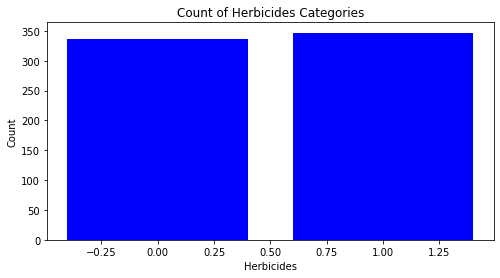

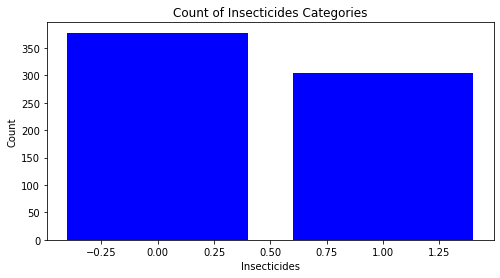

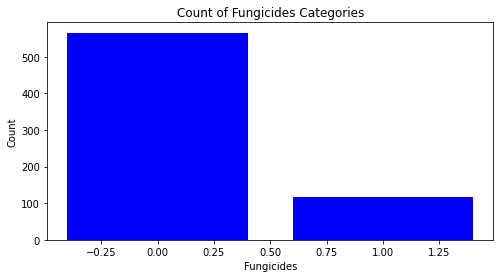

In [9]:
# Bar plot for Herbicides
import matplotlib.pyplot as plt

Herbicides_counts = LC_2.groupBy("Herbicides").count()
Herbicides_counts_pd = Herbicides_counts.toPandas()
plt.figure(figsize=(8, 4))
plt.bar(Herbicides_counts_pd['Herbicides'], Herbicides_counts_pd['count'], color='blue')
plt.xlabel('Herbicides')
plt.ylabel('Count')
plt.title('Count of Herbicides Categories')
plt.show()

# Bar plot for Insecticides

Insecticides_counts = LC_2.groupBy("Insecticides").count()
Insecticides_counts_pd = Insecticides_counts.toPandas()
plt.figure(figsize=(8, 4))
plt.bar(Insecticides_counts_pd['Insecticides'], Insecticides_counts_pd['count'], color='blue')
plt.xlabel('Insecticides')
plt.ylabel('Count')
plt.title('Count of Insecticides Categories')
plt.show()

# Bar plot for Fungicides

Fungicides_counts = LC_2.groupBy("Fungicides").count()
Fungicides_counts_pd = Fungicides_counts.toPandas()
plt.figure(figsize=(8, 4))
plt.bar(Fungicides_counts_pd['Fungicides'], Fungicides_counts_pd['count'], color='blue')
plt.xlabel('Fungicides')
plt.ylabel('Count')
plt.title('Count of Fungicides Categories')
plt.show()


In [10]:
# Variable type for LC_1
LC_1.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- LungCA: integer (nullable = true)
 |-- Gender: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Age_group: integer (nullable = true)
 |-- Status: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- Occupation: integer (nullable = true)
 |-- Residency: integer (nullable = true)
 |-- Distances: integer (nullable = true)
 |-- Cooking_fume: integer (nullable = true)
 |-- Air_Pollution_Exposure: integer (nullable = true)
 |-- CigSmoke: integer (nullable = true)
 |-- Cigarette_year: integer (nullable = true)
 |-- Cigarette_number: integer (nullable = true)
 |-- CigSmoke_status: integer (nullable = true)



In [11]:
# Variable type for LC_2
LC_2.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Herbicides: integer (nullable = true)
 |-- Herbicides_year: string (nullable = true)
 |-- Herbicides_year_group: string (nullable = true)
 |-- Herbicides_day: string (nullable = true)
 |-- Herbicides_day_group: string (nullable = true)
 |-- Insecticides: integer (nullable = true)
 |-- Insecticides_year: string (nullable = true)
 |-- Insecticides_year_group: string (nullable = true)
 |-- Insecticides_day: string (nullable = true)
 |-- Insecticides_day_group: string (nullable = true)
 |-- Fungicides: integer (nullable = true)
 |-- Fungicides_year: string (nullable = true)
 |-- Fungicides_year_group: string (nullable = true)
 |-- Fungicides_day: string (nullable = true)
 |-- Fungicides_day_group: string (nullable = true)
 |-- Glyphosate_use: integer (nullable = true)
 |-- Glyphosate_days: integer (nullable = true)
 |-- Paraquat_use: integer (nullable = true)
 |-- Paraquat_days: integer (nullable = true)
 |-- two_four_Dichlorophenoxy_use: intege

In [12]:
# Change data type to integer for LC_2
from pyspark.sql.types import (StructField,StringType,IntegerType,StructType)
data_schema = [StructField('ID',IntegerType(),True),
              StructField('Herbicides',IntegerType(),True),
              StructField('Herbicides_year',IntegerType(),True),
              StructField('Herbicides_year_group',IntegerType(),True),
              StructField('Herbicides_day',IntegerType(),True),
              StructField('Herbicides_day_group',IntegerType(),True),
              StructField('Insecticides',IntegerType(),True),
              StructField('Insecticides_year',IntegerType(),True),
              StructField('Insecticides_year_group',IntegerType(),True),
              StructField('Insecticides_day',IntegerType(),True),
              StructField('Insecticides_day_group',IntegerType(),True),
              StructField('Fungicides',IntegerType(),True),
              StructField('Fungicides_year',IntegerType(),True),
              StructField('Fungicides_year_group',IntegerType(),True),
              StructField('Fungicides_day',IntegerType(),True),
              StructField('Fungicides_day_group',IntegerType(),True),
              StructField('Glyphosate_use',IntegerType(),True),
              StructField('Glyphosate_days',IntegerType(),True),
              StructField('Paraquat_use',IntegerType(),True),
              StructField('Paraquat_days',IntegerType(),True),
              StructField('two_four_Dichlorophenoxy_use',IntegerType(),True),
              StructField('two_four_Dichlorophenoxy_days',IntegerType(),True),
              StructField('Butachlor_use',IntegerType(),True),
              StructField('Butachlor_Days',IntegerType(),True),
              StructField('Propanil_use',IntegerType(),True),
              StructField('Propanil_days',IntegerType(),True),
              StructField('Alachlor_use',IntegerType(),True),
              StructField('Alachlor_days',IntegerType(),True),
              StructField('Endosalfan_use',IntegerType(),True),
              StructField('Endosalfan_days',IntegerType(),True),
              StructField('Dieldrin_use',IntegerType(),True),
              StructField('Dieldrin_days',IntegerType(),True),
              StructField('DDT_use',IntegerType(),True),
              StructField('DDT_days',IntegerType(),True),
              StructField('Chlorpylifos_use',IntegerType(),True),
              StructField('Chlorpylifos_days',IntegerType(),True),
              StructField('Folidol_use',IntegerType(),True),
              StructField('Folidol_days',IntegerType(),True),
              StructField('Mevinphos_use',IntegerType(),True),
              StructField('Mevinphos_days',IntegerType(),True),
              StructField('Carbaryl_Savins_use',IntegerType(),True),
              StructField('Carbaryl_Savins_days',IntegerType(),True),
              StructField('Carbofuran_use',IntegerType(),True),
              StructField('Carbofuran_days',IntegerType(),True),
              StructField('Abamectin_use',IntegerType(),True),
              StructField('Abamectin_days',IntegerType(),True),
              StructField('Armure_Propiconazole_use',IntegerType(),True),
              StructField('Armure_Propiconazole_days',IntegerType(),True),
              StructField('Metal_aldehyde_use',IntegerType(),True),
              StructField('Metal_aldehyde_days',IntegerType(),True),
              StructField('Morphology_Group',IntegerType(),True),]

final_struct = StructType(fields=data_schema)
LC_2= spark.read.csv('Pesticide and Lung Cancer 2.csv', header=True, schema=final_struct)
LC_2.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Herbicides: integer (nullable = true)
 |-- Herbicides_year: integer (nullable = true)
 |-- Herbicides_year_group: integer (nullable = true)
 |-- Herbicides_day: integer (nullable = true)
 |-- Herbicides_day_group: integer (nullable = true)
 |-- Insecticides: integer (nullable = true)
 |-- Insecticides_year: integer (nullable = true)
 |-- Insecticides_year_group: integer (nullable = true)
 |-- Insecticides_day: integer (nullable = true)
 |-- Insecticides_day_group: integer (nullable = true)
 |-- Fungicides: integer (nullable = true)
 |-- Fungicides_year: integer (nullable = true)
 |-- Fungicides_year_group: integer (nullable = true)
 |-- Fungicides_day: integer (nullable = true)
 |-- Fungicides_day_group: integer (nullable = true)
 |-- Glyphosate_use: integer (nullable = true)
 |-- Glyphosate_days: integer (nullable = true)
 |-- Paraquat_use: integer (nullable = true)
 |-- Paraquat_days: integer (nullable = true)
 |-- two_four_Dichlorophenoxy

In [13]:
# LC_2 recognises null values
LC_2 = LC_2.replace(['', ' '], None)
display(LC_2.toPandas().head(10))

,ID,Herbicides,Herbicides_year,Herbicides_year_group,Herbicides_day,Herbicides_day_group,Insecticides,Insecticides_year,Insecticides_year_group,Insecticides_day,...,Carbaryl_Savins_days,Carbofuran_use,Carbofuran_days,Abamectin_use,Abamectin_days,Armure_Propiconazole_use,Armure_Propiconazole_days,Metal_aldehyde_use,Metal_aldehyde_days,Morphology_Group
0,1,1,5.0,1.0,120.0,1.0,1,5.0,1.0,360.0,...,NaN,1.0,120.0,1.0,120.0,0.0,NaN,0.0,NaN,0.0
1,2,1,20.0,2.0,480.0,2.0,1,20.0,2.0,480.0,...,NaN,0.0,NaN,1.0,480.0,0.0,NaN,0.0,NaN,0.0
2,3,1,20.0,2.0,480.0,2.0,1,20.0,2.0,260.0,...,60.0,0.0,NaN,1.0,60.0,1.0,120.0,0.0,NaN,0.0
3,4,1,40.0,3.0,160.0,1.0,1,25.0,2.0,600.0,...,100.0,1.0,160.0,1.0,100.0,0.0,NaN,0.0,NaN,0.0
4,5,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
5,6,1,30.0,2.0,840.0,3.0,1,30.0,2.0,840.0,...,NaN,0.0,NaN,1.0,840.0,0.0,NaN,0.0,NaN,0.0
6,7,1,25.0,2.0,500.0,2.0,1,25.0,2.0,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
7,8,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
8,9,1,20.0,2.0,80.0,1.0,1,20.0,2.0,80.0,...,NaN,0.0,NaN,1.0,80.0,1.0,80.0,0.0,NaN,0.0
9,10,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0


In [14]:
### 03-DP

# Drop irrelevant columns
LC_1 = LC_1.drop("Status", "Education", "Residency", "CigSmoke_status")
LC_2 = LC_2.drop("Morphology_Group")

In [15]:
# Drop erroneous rows
LC_1 = LC_1.filter(~LC_1.ID.isin(403,417,560))
LC_2 = LC_2.filter(~LC_2.ID.isin(403,417,560))

In [16]:
# Fill all null values with 0 for LC_2
LC_2=LC_2.na.fill(0)
display(LC_2.toPandas().head(10))

,ID,Herbicides,Herbicides_year,Herbicides_year_group,Herbicides_day,Herbicides_day_group,Insecticides,Insecticides_year,Insecticides_year_group,Insecticides_day,...,Carbaryl_Savins_use,Carbaryl_Savins_days,Carbofuran_use,Carbofuran_days,Abamectin_use,Abamectin_days,Armure_Propiconazole_use,Armure_Propiconazole_days,Metal_aldehyde_use,Metal_aldehyde_days
0,1,1,5,1,120,1,1,5,1,360,...,0,0,1,120,1,120,0,0,0,0
1,2,1,20,2,480,2,1,20,2,480,...,0,0,0,0,1,480,0,0,0,0
2,3,1,20,2,480,2,1,20,2,260,...,1,60,0,0,1,60,1,120,0,0
3,4,1,40,3,160,1,1,25,2,600,...,1,100,1,160,1,100,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,1,30,2,840,3,1,30,2,840,...,0,0,0,0,1,840,0,0,0,0
6,7,1,25,2,500,2,1,25,2,0,...,0,0,0,0,0,0,0,0,0,0
7,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,1,20,2,80,1,1,20,2,80,...,0,0,0,0,1,80,1,80,0,0
9,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Outliers for LC_1 Cigarette_number
LC_1.select("Cigarette_number").describe().show()

+-------+-----------------+
|summary| Cigarette_number|
+-------+-----------------+
|  count|              680|
|   mean|5.147058823529412|
| stddev|7.380395768854769|
|    min|                0|
|    max|               45|
+-------+-----------------+



In [18]:
# Show outliers
out = LC_1.filter(LC_1['Cigarette_number'] > 26)
out.show()

+---+------+------+---+---------+----------+---------+------------+----------------------+--------+--------------+----------------+
| ID|LungCA|Gender|Age|Age_group|Occupation|Distances|Cooking_fume|Air_Pollution_Exposure|CigSmoke|Cigarette_year|Cigarette_number|
+---+------+------+---+---------+----------+---------+------------+----------------------+--------+--------------+----------------+
|550|     1|     1| 46|        1|         2|        1|           1|                     1|       1|            30|              30|
|558|     1|     1| 76|        4|         2|        1|           1|                     1|       1|            30|              30|
|601|     1|     0| 61|        2|         1|        3|           2|                     1|       1|            40|              40|
|608|     1|     1| 63|        2|         2|        1|           2|                     1|       1|            40|              40|
|610|     1|     1| 81|        4|         2|        1|           2|         

In [19]:
# Coerce outlier values to 26
from pyspark.sql.functions import when
LC_1 = LC_1.withColumn("Cigarette_number", when(LC_1["ID"] == 550, 26).otherwise(LC_1["Cigarette_number"]))
LC_1 = LC_1.withColumn("Cigarette_number", when(LC_1["ID"] == 558, 26).otherwise(LC_1["Cigarette_number"]))
LC_1 = LC_1.withColumn("Cigarette_number", when(LC_1["ID"] == 601, 26).otherwise(LC_1["Cigarette_number"]))
LC_1 = LC_1.withColumn("Cigarette_number", when(LC_1["ID"] == 608, 26).otherwise(LC_1["Cigarette_number"]))
LC_1 = LC_1.withColumn("Cigarette_number", when(LC_1["ID"] == 610, 26).otherwise(LC_1["Cigarette_number"]))
LC_1 = LC_1.withColumn("Cigarette_number", when(LC_1["ID"] == 627, 26).otherwise(LC_1["Cigarette_number"]))
LC_1 = LC_1.withColumn("Cigarette_number", when(LC_1["ID"] == 628, 26).otherwise(LC_1["Cigarette_number"]))
LC_1 = LC_1.withColumn("Cigarette_number", when(LC_1["ID"] == 643, 26).otherwise(LC_1["Cigarette_number"]))
LC_1 = LC_1.withColumn("Cigarette_number", when(LC_1["ID"] == 676, 26).otherwise(LC_1["Cigarette_number"]))

In [20]:
# Construct new variable Cig_Total_Num
LC_1=LC_1.withColumn('Cig_Total_Num',LC_1['Cigarette_number']*LC_1['Cigarette_year']*300)

In [21]:
# Combine 2 datasets
LC_2 = LC_2.drop("ID")


from pyspark.sql.functions import monotonically_increasing_id
LC_1 = LC_1.withColumn("index", monotonically_increasing_id())
LC_2 = LC_2.withColumn("index", monotonically_increasing_id())
LC = LC_1.join(LC_2, "index").drop("index")

display(LC.toPandas().head(10))

,ID,LungCA,Gender,Age,Age_group,Occupation,Distances,Cooking_fume,Air_Pollution_Exposure,CigSmoke,...,Carbaryl_Savins_use,Carbaryl_Savins_days,Carbofuran_use,Carbofuran_days,Abamectin_use,Abamectin_days,Armure_Propiconazole_use,Armure_Propiconazole_days,Metal_aldehyde_use,Metal_aldehyde_days
0,1,0,1,38,1,1,1,2,1,0,...,0,0,1,120,1,120,0,0,0,0
1,2,0,0,42,1,1,3,2,0,0,...,0,0,0,0,1,480,0,0,0,0
2,3,0,0,44,1,1,1,2,0,0,...,1,60,0,0,1,60,1,120,0,0
3,4,0,0,45,1,1,1,2,1,0,...,1,100,1,160,1,100,0,0,0,0
4,5,0,1,45,1,1,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5,6,0,0,46,1,1,3,2,0,0,...,0,0,0,0,1,840,0,0,0,0
6,7,0,1,48,1,1,3,1,1,0,...,0,0,0,0,0,0,0,0,0,0
7,8,0,0,49,1,1,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,0,1,50,1,1,3,2,0,0,...,0,0,0,0,1,80,1,80,0,0
9,10,0,0,50,1,1,1,2,1,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Change column orders
new_col_order=['ID', 'LungCA', 'Gender', 'Age', 'Age_group', 'Occupation', 'Distances',
       'Cooking_fume', 'Air_Pollution_Exposure', 'CigSmoke', 'Cigarette_year',
       'Cigarette_number', 'Cig_Total_Num', 'Herbicides', 'Herbicides_year',
       'Herbicides_year_group', 'Herbicides_day', 'Herbicides_day_group',
       'Insecticides', 'Insecticides_year', 'Insecticides_year_group',
       'Insecticides_day', 'Insecticides_day_group', 'Fungicides',
       'Fungicides_year', 'Fungicides_year_group', 'Fungicides_day',
       'Fungicides_day_group','Glyphosate_use', 'Glyphosate_days',
       'Paraquat_use', 'Paraquat_days', 'two_four_Dichlorophenoxy_use',
       'two_four_Dichlorophenoxy_days', 'Butachlor_use', 'Butachlor_Days',
       'Propanil_use', 'Propanil_days', 'Alachlor_use', 'Alachlor_days',
       'Endosalfan_use', 'Endosalfan_days', 'Dieldrin_use', 'Dieldrin_days',
       'DDT_use', 'DDT_days', 'Chlorpylifos_use', 'Chlorpylifos_days',
       'Folidol_use', 'Folidol_days', 'Mevinphos_use', 'Mevinphos_days',
       'Carbaryl_Savins_use', 'Carbaryl_Savins_days', 'Carbofuran_use',
       'Carbofuran_days', 'Abamectin_use', 'Abamectin_days',
       'Armure_Propiconazole_use', 'Armure_Propiconazole_days',
       'Metal_aldehyde_use', 'Metal_aldehyde_days']
LC_df = LC.select(new_col_order)

In [23]:
LC_df = LC_df.toPandas()

In [24]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [25]:
### 04-DT

# Feature Selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

LC_data = LC_df.iloc[:, 2:]
LC_target = LC_df['LungCA']
X, y = LC_data, LC_target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(penalty='l1', solver='liblinear', C=0.08)
logreg.fit(X_train_scaled, y_train)

selected_features = [index for index, coef in enumerate(logreg.coef_[0]) if coef != 0]

print("Selected features:", selected_features)

accuracy = logreg.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

Selected features: [1, 5, 9, 12, 13, 14, 33, 36, 37, 41, 42, 43, 45, 50, 53, 54]
Accuracy: 0.6838235294117647


In [26]:
# Selected features
print(LC_data.columns[[1, 5, 9, 12, 13, 14, 33, 36, 37, 41, 42, 43, 45, 50, 53, 54]])

Index(['Age', 'Cooking_fume', 'Cigarette_number', 'Herbicides_year',
       'Herbicides_year_group', 'Herbicides_day', 'Butachlor_Days',
       'Alachlor_use', 'Alachlor_days', 'Dieldrin_days', 'DDT_use', 'DDT_days',
       'Chlorpylifos_days', 'Carbaryl_Savins_use', 'Carbofuran_days',
       'Abamectin_use'],
      dtype='object')


<AxesSubplot:>

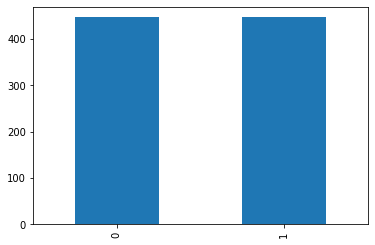

In [27]:
# Boosting uneven data
import pandas as pd
from sklearn.utils import resample
LC_df_NCA=LC_df[LC_df['LungCA']==0] 
LC_df_CA=LC_df[LC_df['LungCA']==1] 
LC_df_CA_boost=resample(LC_df_CA,replace=True,n_samples=len(LC_df_NCA))
LC_df_boosted=pd.concat([LC_df_NCA,LC_df_CA_boost])
LC_df_boosted['LungCA'].value_counts().plot.bar()

In [28]:
# Create target and attributes
LC_target=LC_df_boosted['LungCA']
LC_selected_data=LC_df_boosted[['Age', 'Cooking_fume', 'Cigarette_number', 'Herbicides_year',
       'Herbicides_year_group', 'Herbicides_day', 'Butachlor_Days',
       'Alachlor_use', 'Alachlor_days', 'Dieldrin_days', 'DDT_use', 'DDT_days',
       'Chlorpylifos_days', 'Carbaryl_Savins_use', 'Carbofuran_days',
       'Abamectin_use']]

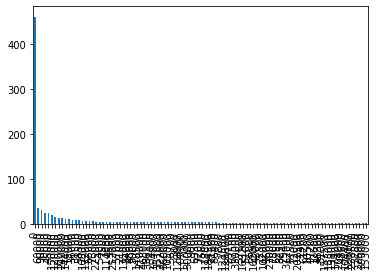

In [29]:
# Transform Cig_Total_Num
LC_df_boosted['Cig_Total_Num'].value_counts().plot.bar()

import numpy as np
LC_df_boosted['Cig_Total_Num']=np.sqrt(LC_df_boosted['Cig_Total_Num'])

In [30]:
### 05-DMM
# 'Supervised Learning-Classification'

In [31]:
### 06-DMA

# Logistic Regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X=LC_selected_data
y=LC_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7597765363128491


/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
# Naive Baye
from sklearn.naive_bayes import GaussianNB

NBfit=GaussianNB().fit(X_train,y_train) 

NBfit.score(X_test,y_test)

0.6927374301675978

In [33]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


In [34]:
### 07-DM

# Logistic Regression
import statsmodels.api as sm

X=LC_selected_data
y=LC_target
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logit_model = sm.Logit(y_train, X_train)

result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.563649
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 LungCA   No. Observations:                  715
Model:                          Logit   Df Residuals:                      698
Method:                           MLE   Df Model:                           16
Date:                Thu, 23 May 2024   Pseudo R-squ.:                  0.1867
Time:                        23:09:28   Log-Likelihood:                -403.01
converged:                       True   LL-Null:                       -495.54
Covariance Type:            nonrobust   LLR p-value:                 8.095e-31
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.6216      0.645     -0.964      0.335      -1.886       0.

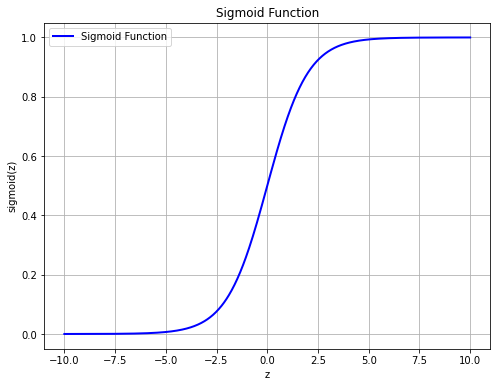

In [35]:
### 08-Int

# Visualization
import numpy as np
coefficients = result.params
z = np.dot(X_test, coefficients)
sigmoid_values = 1 / (1 + np.exp(-z))

import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z_values = np.linspace(-10, 10, 1000)

sigmoid_values = sigmoid(z_values)

plt.figure(figsize=(8, 6))
plt.plot(z_values, sigmoid_values, label='Sigmoid Function', color='b', linewidth=2)
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.grid(True)
plt.legend()
plt.show()

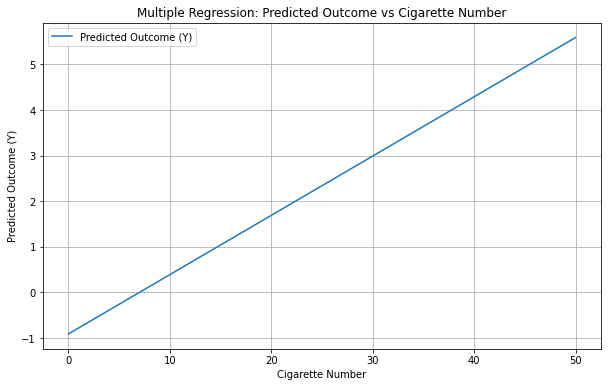

In [36]:
import numpy as np
import matplotlib.pyplot as plt

intercept = -0.91
coef_cigarette = 0.13
coef_herbicides = 0.0018
coef_chlorpylifos = 0.0019
coef_carbofuran = 0.0007

cigarette_number = np.linspace(0, 50) 

herbicides_day = 0  
chlorpylifos_days = 0 
carbofuran_days = 0 

Y = (intercept + 
     coef_cigarette * cigarette_number + 
     coef_herbicides * herbicides_day + 
     coef_chlorpylifos * chlorpylifos_days + 
     coef_carbofuran * carbofuran_days)

plt.figure(figsize=(10, 6))
plt.plot(cigarette_number, Y, label='Predicted Outcome (Y)')
plt.xlabel('Cigarette Number')
plt.ylabel('Predicted Outcome (Y)')
plt.title('Multiple Regression: Predicted Outcome vs Cigarette Number')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
# Assessing model
from sklearn.metrics import classification_report
y_pred = result.predict(X_test)

y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred_binary))

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

Accuracy: 0.6983240223463687
              precision    recall  f1-score   support

           0       0.70      0.74      0.72        94
           1       0.70      0.65      0.67        85

    accuracy                           0.70       179
   macro avg       0.70      0.70      0.70       179
weighted avg       0.70      0.70      0.70       179

AUC: 0.794180225281602


In [38]:
# Iteration

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

LC_data = LC_df.iloc[:, 2:]
LC_target = LC_df['LungCA']
X, y = LC_data, LC_target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
logreg.fit(X_train_scaled, y_train)

selected_features = [index for index, coef in enumerate(logreg.coef_[0]) if coef != 0]

print("Selected features:", selected_features)

print(LC_data.columns[[0, 1, 3, 5, 9, 10, 12, 13, 14, 27, 33, 37, 38, 43, 45, 50, 53, 54]])

Selected features: [0, 1, 3, 5, 9, 10, 12, 13, 14, 27, 33, 37, 38, 43, 45, 50, 53, 54]
Index(['Gender', 'Age', 'Occupation', 'Cooking_fume', 'Cigarette_number',
       'Cig_Total_Num', 'Herbicides_year', 'Herbicides_year_group',
       'Herbicides_day', 'Glyphosate_days', 'Butachlor_Days', 'Alachlor_days',
       'Endosalfan_use', 'DDT_days', 'Chlorpylifos_days',
       'Carbaryl_Savins_use', 'Carbofuran_days', 'Abamectin_use'],
      dtype='object')


In [39]:
# Boosting uneven data
import pandas as pd
from sklearn.utils import resample
LC_df_NCA=LC_df[LC_df['LungCA']==0] 
LC_df_CA=LC_df[LC_df['LungCA']==1] 
LC_df_CA_boost=resample(LC_df_CA,replace=True,n_samples=len(LC_df_NCA))
LC_df_boosted=pd.concat([LC_df_NCA,LC_df_CA_boost])

In [40]:
# Create target and attributes
LC_target=LC_df_boosted['LungCA']
LC_selected_data=LC_df_boosted[['Gender', 'Age', 'Occupation', 'Cooking_fume', 'Cigarette_number',
       'Cig_Total_Num', 'Herbicides_year', 'Herbicides_year_group',
       'Herbicides_day', 'Glyphosate_days', 'Butachlor_Days', 'Alachlor_days',
       'Endosalfan_use', 'DDT_days', 'Chlorpylifos_days',
       'Carbaryl_Savins_use', 'Carbofuran_days', 'Abamectin_use']]

In [41]:
# SVM
from sklearn.svm import SVC

SVCfit=SVC().fit(X_train,y_train)

SVCfit.score(X_test,y_test)

0.6666666666666666

In [42]:
# Reiterated Logistic Regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X=LC_selected_data
y=LC_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.654275092936803


/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
